<a href="https://colab.research.google.com/github/yedhuk/basic-machine-learning-algorithms-from-scratch/blob/main/LogisticRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

1. Define Sigmoid Function
2. Initialize weights and biases
3. Define Loss function
4. Perform Gradient Descent / Backpropogation
5. Train routine
6. Predict routine

In [2]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [3]:
def init_parameters_binary(n_features):
  w = np.zeros(n_features)
  print(f"Type of weight Matrix : {type(w)}")
  print(f"Shape of weight Matrix : {w.shape}")
  b = 0
  return w,b



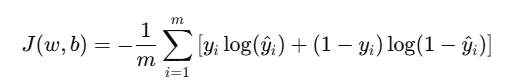

If squared loss is chosed as cost function , it is observed that at higher dimensions the function is not convex leading to many local minima , but a convex function is required for gradient descent to work

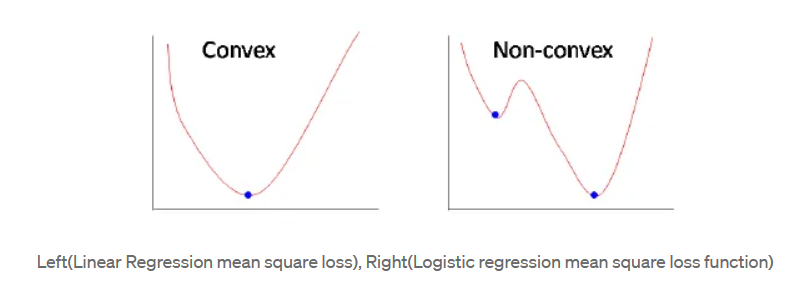

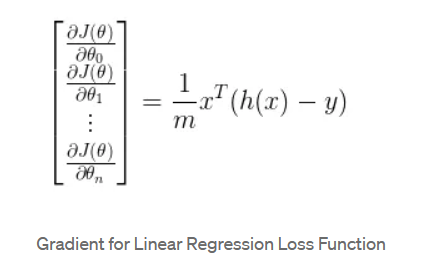

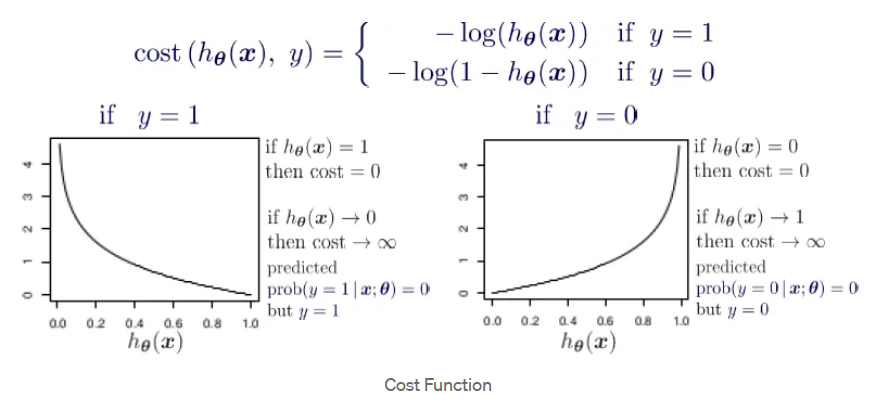

In [4]:
def compute_log_loss(y,y_pred):
  print(f"Type of y vector : {type(y)}")
  print(f"Shape of y vector : {y.shape}")
  return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

In [5]:
def gradient_descent_binary(X,y,w,b,learning_rate):
  m = X.shape[0]
  print(f"X : {X.shape} * w : {y.shape}")
  y_pred = sigmoid(np.dot(X,w)+b)
  print(f"y_pred : {y_pred}")
  dw = np.dot(X.T,(y_pred - y))/m
  db = np.mean(y_pred - y)

  w -= learning_rate*dw
  b -= learning_rate*db

  return w,b

In [6]:
def train(X,y,learning_rate = 0.01, num_iterations = 1000):
  n_features = X.shape[1]
  w,b = init_parameters_binary(n_features)
  costs = []
  weights_history = []
  bias_history = []
  for i in range(num_iterations):
    w,b = gradient_descent_binary(X,y,w,b,learning_rate)
    weights_history.append(w.copy())
    bias_history.append(b)

    #if(i%100 == 0):
    y_pred = sigmoid(np.dot(X,w)+b)
    #print(f"y pred : {y_pred}")
    cost = compute_log_loss(y,y_pred)
    costs.append(cost)

    print(f"Iteration {i}: Cost = {cost}")

  return w,b,costs,weights_history,bias_history

In [7]:
def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    return (y_pred >= 0.5).astype(int)

In [8]:
def plot_gradient_descent(costs):
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Reduction Over Iterations (Gradient Descent)")
    plt.show()

In [9]:
data = load_iris(as_frame = True)

In [10]:
df = data.frame

In [11]:
df[df['target']!=0] = 1

In [12]:
X = df.drop(columns = ['target'])

In [13]:
df['target'].unique()

array([0, 1])

In [14]:
y = df['target']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
pca = PCA(n_components=2)
X_train_scaled_decomposed = pca.fit_transform(X_train_scaled)
X_test_scaled_decomposed = pca.transform(X_test_scaled)

In [18]:
y_train.shape

(120,)

In [19]:
w,b,costs,weights_history,bias_history = train(X_train_scaled_decomposed,y_train)

Streaming output truncated to the last 5000 lines.
 0.02550626 0.94268237 0.0676175  0.94268237 0.03464597 0.94268237
 0.94268237 0.01638145 0.02584174 0.94268237 0.065748   0.94268237
 0.94268237 0.0134281  0.94268237 0.94268237 0.94268237 0.94268237
 0.94268237 0.00592203 0.01313286 0.94268237 0.94268237 0.94268237
 0.94268237 0.94268237 0.94268237 0.94268237 0.94268237 0.01321987]
Type of y vector : <class 'pandas.core.series.Series'>
Shape of y vector : (120,)
Iteration 791: Cost = 0.04687864193264632
X : (120, 2) * w : (120,)
y_pred : [0.94275017 0.94275017 0.94275017 0.94275017 0.94275017 0.00937845
 0.94275017 0.01683561 0.94275017 0.94275017 0.94275017 0.02057342
 0.94275017 0.94275017 0.94275017 0.94275017 0.00483184 0.01588781
 0.03383712 0.94275017 0.01281674 0.01877303 0.94275017 0.94275017
 0.94275017 0.94275017 0.94275017 0.94275017 0.94275017 0.94275017
 0.01066626 0.94275017 0.94275017 0.02147182 0.03332272 0.94275017
 0.02763709 0.94275017 0.94275017 0.94275017 0.94275

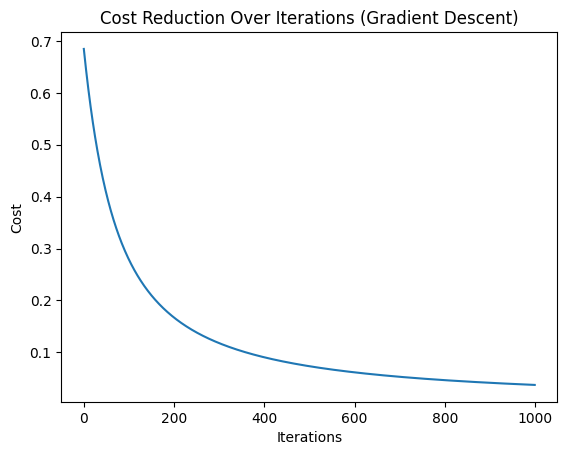

In [20]:
plot_gradient_descent(costs)

In [21]:
y_pred = predict(X_test_scaled_decomposed,w,b)

In [22]:
target_names = ['0','1']

In [23]:
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Multiclass Classification (Softmax)

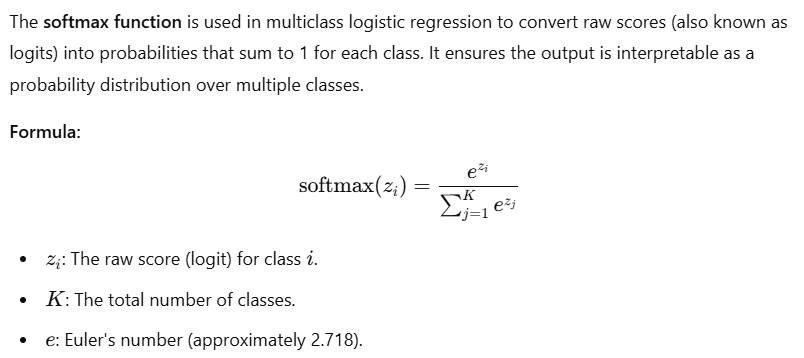

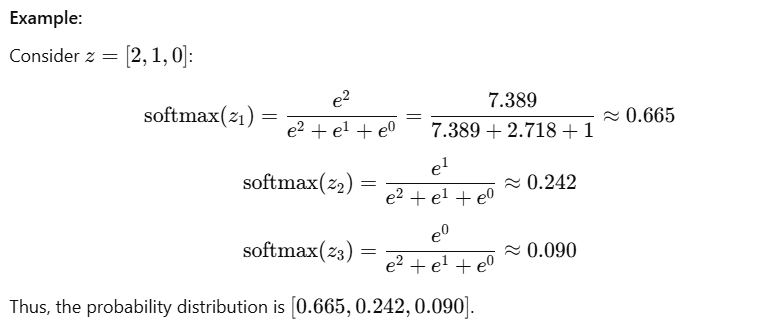

#Cross Entropy Loss

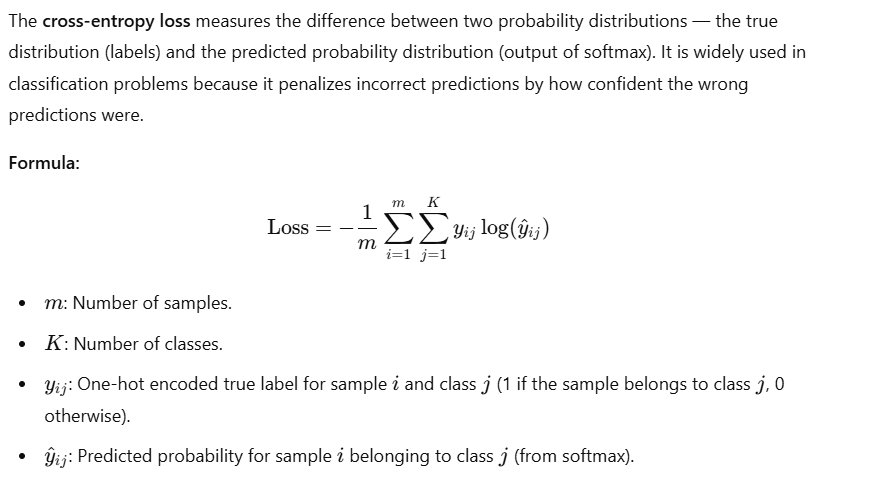

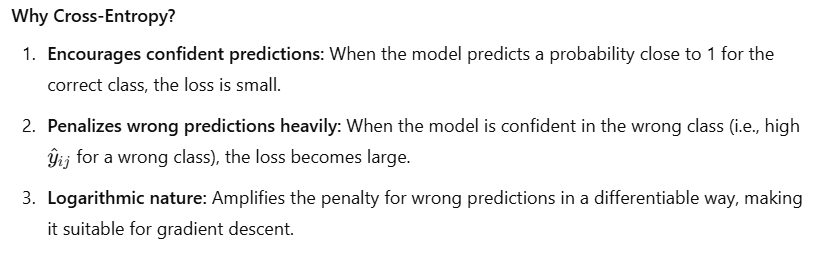

In [24]:
def softmax(z):
  exp_z = np.exp(z-np.max(z,axis=1,keepdims = True))
  return exp_z / np.sum(exp_z,axis=1,keepdims = True)


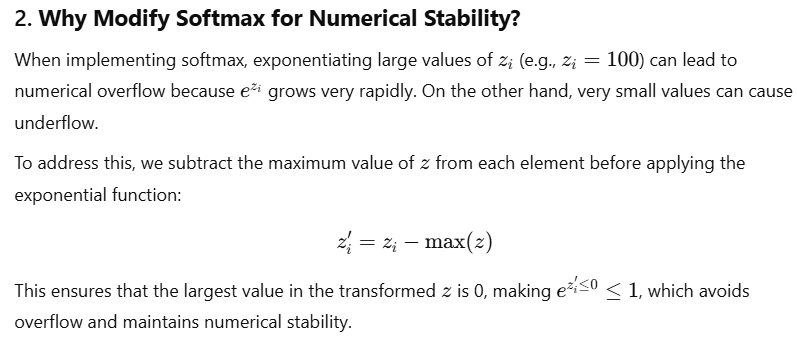

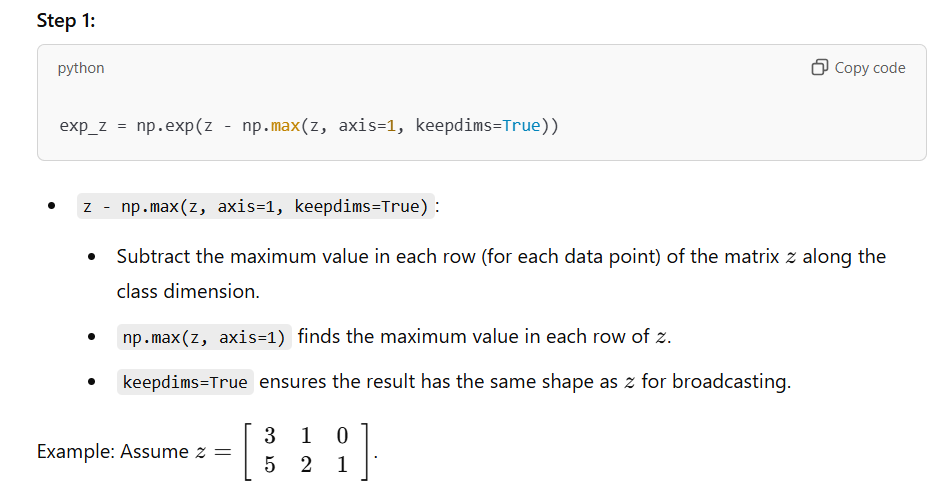

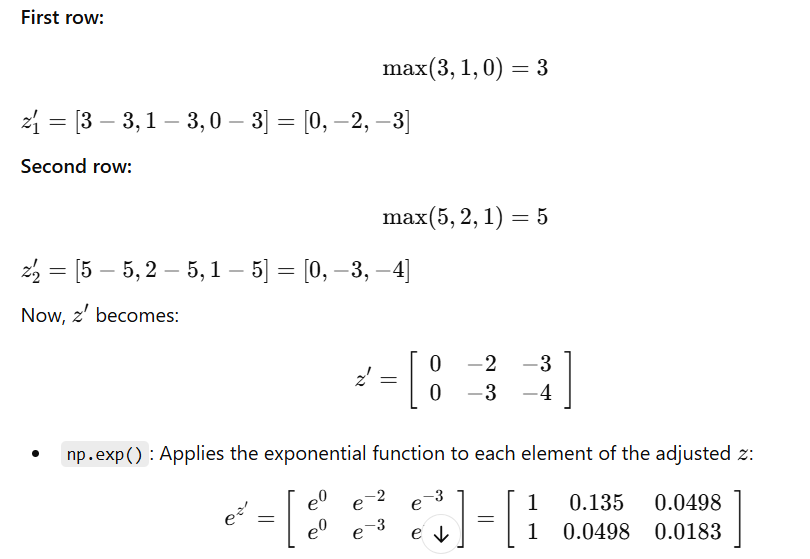

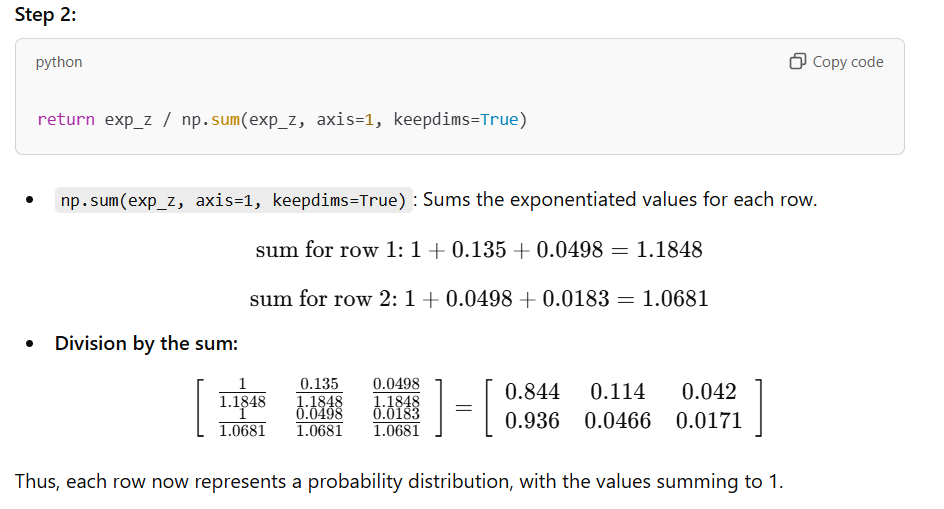

In [25]:
def compute_cross_entropy_loss(y, y_pred):
    m = y.shape[0]
    cost = -np.sum(y * np.log(y_pred)) / m
    return cost

In [26]:
def one_hot_encode(y, num_classes):
    y_encoded = np.zeros((len(y), num_classes))
    y_encoded[np.arange(len(y)), y] = 1
    return y_encoded

In [27]:
def init_parameters_softmax(n_features, n_classes):
  weights = np.zeros((n_features, n_classes))
  bias = np.zeros(n_classes)
  print(f"Type of weight Matrix : {type(weights)}")
  print(f"Shape of weight Matrix : {weights.shape}")
  return weights,bias

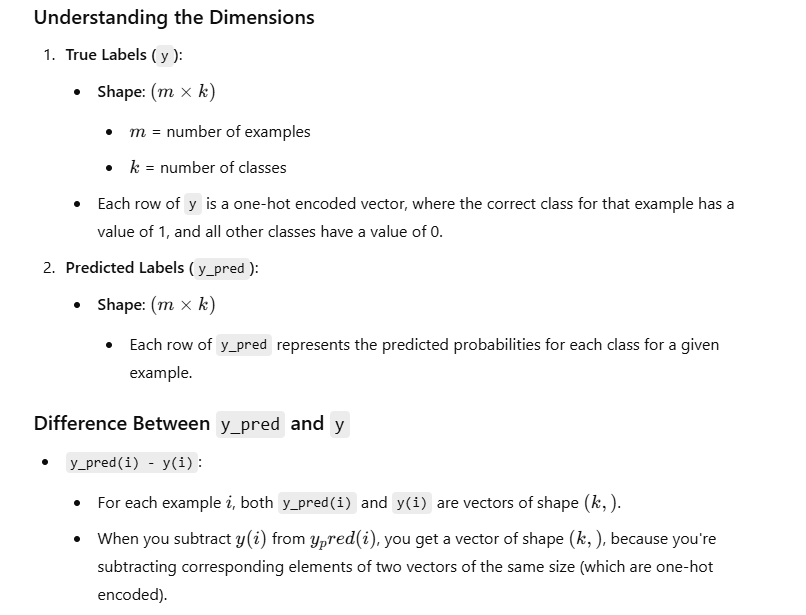

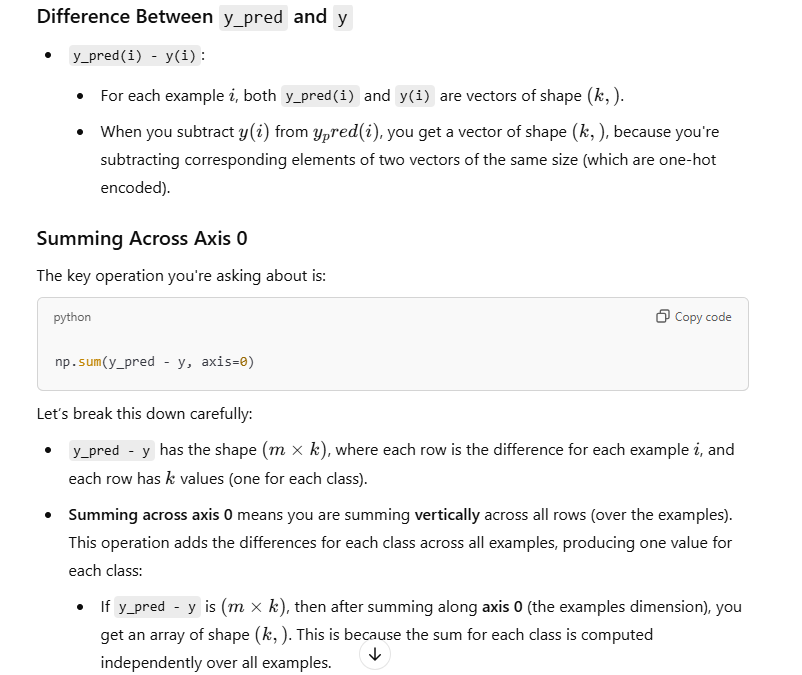

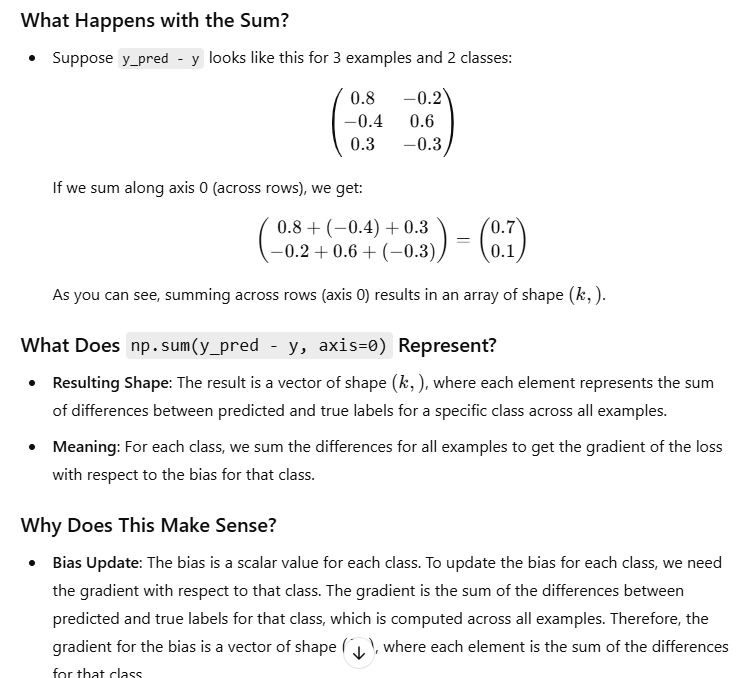

In [28]:
def gradient_descent_softmax(X,y,w,b,learning_rate):
  m = X.shape[0]

  z = np.dot(X, w) + b
  y_pred = softmax(z)
  print(f"X : {X.T.shape} * y : {(y_pred - y).shape}")
  print(f"Shape of y : {y.shape}")
  print(f"Shape of y_pred : {y_pred.shape}")
  print(f"y_pred : {y_pred}")
  dw = np.dot(X.T, (y_pred - y)) / m
  print(f"dw : {dw.shape}")
  db = np.sum(y_pred - y, axis=0) / m
  print(f"db : {db.shape}")
  w -= learning_rate*dw
  b -= learning_rate*db

  return w,b

In [29]:
def train_softmax(X,y,learning_rate = 0.01, num_iterations = 1000):
  n_features = X.shape[1]
  n_classes = y.nunique()
  y_encoded = one_hot_encode(y,n_classes)
  w,b = init_parameters_softmax(n_features,n_classes)
  costs = []
  weights_history = []
  bias_history = []
  for i in range(num_iterations):
    w,b = gradient_descent_softmax(X,y_encoded,w,b,learning_rate)
    print(w,b)
    weights_history.append(w.copy())
    bias_history.append(b)

    #if(i%100 == 0):
    z = np.dot(X, w) + b
    print(f"z : {z.shape}")
    y_pred = softmax(z)
    #print(f"y pred : {y_pred}")
    cost = compute_cross_entropy_loss(y_encoded,y_pred)
    costs.append(cost)

    print(f"Iteration {i}: Cost = {cost}")

  return w,b,costs,weights_history,bias_history

In [30]:
def predict_softmax(X, w, b):
    # Compute logits
    z = np.dot(X, w) + b
    # Apply softmax to get probabilities
    y_pred = softmax(z)
    # Get the index of the maximum probability for each input
    predictions = np.argmax(y_pred, axis=1)
    return predictions

In [31]:
data = load_iris(as_frame = True)

In [32]:
df = data.frame

In [33]:
X = df.drop(columns=['target'])

In [34]:
y = df['target']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
w,b,costs,weights_history,bias_history = train_softmax(X_train_scaled,y_train)

Streaming output truncated to the last 5000 lines.
 [1.35492694e-02 6.98175917e-01 2.88274814e-01]
 [5.36793422e-02 3.10254277e-01 6.36066381e-01]
 [2.32285959e-02 3.61491567e-01 6.15279837e-01]
 [9.36484428e-01 5.81520398e-02 5.36353261e-03]
 [8.78116048e-01 1.16697732e-01 5.18622015e-03]
 [2.11136121e-02 5.01801883e-01 4.77084505e-01]
 [1.05786081e-01 5.64930479e-01 3.29283440e-01]
 [8.81923164e-03 2.27147254e-01 7.64033514e-01]
 [1.69073390e-01 6.88434422e-01 1.42492188e-01]
 [3.21450849e-02 4.25594424e-01 5.42260492e-01]
 [2.24061403e-02 2.10352543e-01 7.67241317e-01]
 [1.93052585e-02 5.55442681e-01 4.25252060e-01]
 [4.38430028e-03 9.15808372e-02 9.04034863e-01]
 [9.81510068e-01 1.70946262e-02 1.39530582e-03]]
dw : (4, 3)
db : (3,)
[[-0.57868631  0.16835742  0.41032889]
 [ 0.61819161 -0.60940381 -0.0087878 ]
 [-0.84055348  0.07186015  0.76869333]
 [-0.78425739 -0.16804992  0.95230731]] [-0.25863175  0.37648935 -0.11785759]
z : (120, 3)
Iteration 961: Cost = 0.328836631123994
X : (4

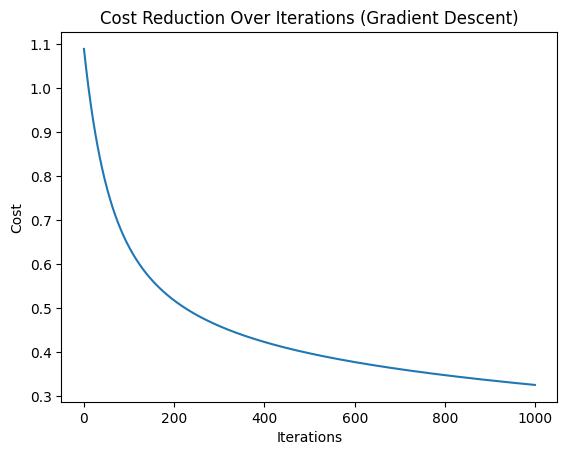

In [38]:
plot_gradient_descent(costs)

In [39]:
y_pred = predict_softmax(X_test_scaled,w,b)

In [40]:
target_names = ['0','1','2']

In [41]:
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



In [91]:
def sub(x, m, n):
    return f'{x}<sup>({m}&times;{n})</sup>'

In [92]:
def sub_ss(x,ss, m, n):
    return f'{x}<sub>{ss}</sub><sup>({m}&times;{n})</sup>'

In [93]:
def vec_ss(x,ss,m):
    return f'{x}<sub>{ss}</sub><sup>({m},)</sup>'


In [94]:
def vec(x,m):
    return f'{x}<sup>({m},)</sup>'

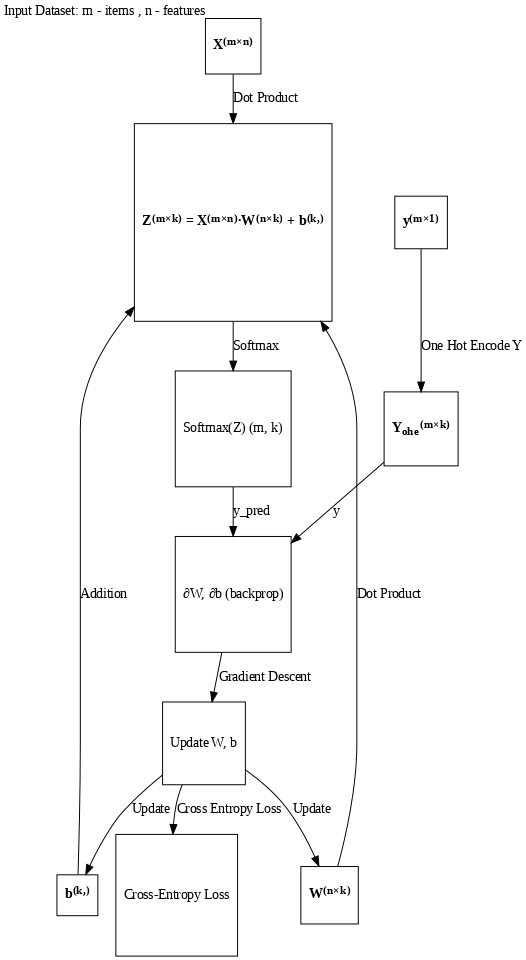

In [104]:
from graphviz import Digraph
from IPython.display import Image

def create_training_diagram():
    # Initialize the directed graph
    dot = Digraph(format='png', engine='dot')
    dot.attr(rankdir='TB', size='10')

    Z_label = sub("Z","m","k")
    X_label = sub("X", "m", "n")
    W_label = sub("W", "n", "k")
    b_label = vec("b", "k")
    yohe_label = sub_ss("Y","ohe", "m","k")
    y_label = sub("y","m","1")


    # Add nodes with matrix descriptions
    dot.node("X", label = f"<<B>{X_label}</B>>",xlabel='Input Dataset: m - items , n - features', shape="square")  # Input data
    dot.node("W", label=f'<<B>{W_label}</B>>', shape="square")  # Weights
    dot.node("b", label=f'<<B>{b_label}</B>>', shape="square")  # Bias
    dot.node("Z", label=f'<<B>{Z_label} = {X_label}&middot;{W_label} + {b_label}</B>>', shape="square")  # Logits
    dot.node("Softmax", "Softmax(Z) (m, k)", shape="square")  # Activation
    dot.node("Y2", label=f'<<B>{yohe_label}</B>>', shape="square")  # One-hot labels
    dot.node("Y1", label=f'<<B>{y_label}</B>>', shape="square")  # y labels
    dot.node("Loss", "Cross-Entropy Loss", shape="square")  # Loss computation
    dot.node("Gradients", "∂W, ∂b (backprop)", shape="square")  # Gradients
    dot.node("Update", "Update W, b", shape="square")  # Update step

    # Connect nodes with matrix operations
    dot.edge("X", "Z", label="Dot Product")
    dot.edge("W", "Z", label="Dot Product")
    dot.edge("b", "Z", label="Addition")
    dot.edge("Z", "Softmax", label="Softmax")
    dot.edge("Softmax", "Gradients", label="y_pred")
    dot.edge("Y1", "Y2", label="One Hot Encode Y")
    dot.edge("Y2", "Gradients", label="y")
    dot.edge("Update", "Loss", label="Cross Entropy Loss")
    dot.edge("Gradients", "Update", label="Gradient Descent")
    dot.edge("Update", "W", label="Update")
    dot.edge("Update", "b", label="Update")

    return dot

# Create the diagram
diagram = create_training_diagram()

# Render the diagram to a file and display it inline

# Render the diagram without explicit extension
file_path = "/content/training_process_diagram"
diagram.render(file_path, cleanup=True)

# Display the diagram
Image(filename=f"{file_path}.png")

# Display the diagram

